# MSDS-432: Module 5 - Exploring Hashing  
Jason Adam  

## Imports

In [108]:
import functools
from math import floor
import random
import string
import time
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [109]:
class TimeFunc:
    """Decorator to return run time of function in seconds."""
    def __init__(self, func):
        functools.update_wrapper(self, func)
        self.func = func
        self.func_time = 0
        
    def __call__(self, *args, **kwargs):
        start_time = time.perf_counter()
        result = self.func(*args, **kwargs)
        end_time = time.perf_counter()
        run_time = end_time - start_time
        self.func_time = run_time
        return result


# Define Quicksort
@TimeFunc
def quick_sort(l: list) -> list:
    """Quicksort algorithm.
    
    Parameters
    ----------
    l: list
        List of values to be sorted
        
    Returns
    -------
    list:
        Sorted list
    """
    if len(l) < 2:
        return l
    else:
        pivot = l[0]
        less: list = [i for i in l[1:] if i <= pivot]
        greater: list = [i for i in l[1:] if i > pivot]
        return quick_sort(less) + [pivot] + quick_sort(greater)

    
@TimeFunc
def simple_search(sorted_array: list, item: str) -> Tuple[int, int]:
    """Perform a simple search on an array.
    
    Parameters
    ----------
    sorted_array: np.array
        Sorted numpy array to be searched.
    item: int
        The value to search for in the array.
        
    Returns
    -------
    Tuple[int, int]
        First value is the target item.
        Second value is the number of steps to get
        the target item.
    """
    start = 0
    steps = 0
    while sorted_array[start] <= item:
        guess = sorted_array[start]
        if guess == item:
            steps += 1
            return start, steps
        else:
            steps += 1
            start += 1
    return None, None


@TimeFunc
def binary_search(sorted_array: list, item: str) -> Tuple[int, int]:
    """Perform Binary search on sorted array.
    
    Parameters
    ----------
    sorted_array: np.array
        Sorted numpy array to be searched.
    item: int
        The value to search for in the array.
        
    Returns
    -------
    Tuple[int, int]
        First value is the target item.
        Second value is the number of steps to get
        the target item.
    """
    low: int = 0
    high: int = len(sorted_array) - 1
    steps: int = 0
    while low <= high:
        # Cut the list in half
        mid: int = floor((low + high) / 2)
        # Guess the midway point
        guess: int = sorted_array[mid]
        if guess == item:
            steps += 1
            return mid, steps
        # If midway point is higher, make
        # new high one less than mid-point
        elif guess > item:
            steps += 1
            high = mid - 1
        # If midway point lower, make
        # new high one higher than mid-point
        else:
            steps += 1
            low = mid + 1
    return None, None


## 1. Create Datasets  
* Create a list of 100,000 names (randomly pick 10 characters e.g. abcdefghij, any order is fine, just make sure there are no duplicates in the name) and store those names in an unsorted list.  
* Now store the above names in a set (https://docs.python.org/3.7/library/stdtypes.html ).  
* Make a separate copy of the list and sort it using any sorting algorithm that you have learned so far and justify why are you using it. Capture the time it takes to sort the list.

In [110]:
random.seed(432)
names: list = ["".join(random.choices(string.ascii_letters, k=10)) for _ in range(100000)]

random.seed(432)
names_unique: set = set(names)

random.seed(432)
names_sorted: list = quick_sort(names)

ns_qs = quick_sort.func_time

In [111]:
# Check Output - Unsorted
names[0:5]

['EIdPuKjPHI', 'AVlroLlIQX', 'ipLqUlPHfq', 'UYrVAuIpOP', 'LEwWcoEQht']

In [112]:
# Check Output - Set
cnt = 0
for i in names_unique:
    if cnt == 5:
        break
    else:
        print(i)
        cnt += 1

zYLNPofnMD
SgrCfGVAll
tnleXVRyaA
TyjkEuDqlA
RkfnUgTSFk


In [113]:
# Check Output - Sorted
names_sorted[0:5]

['AADFLuZAlG', 'AAHNhpioaz', 'AAIApXFXRM', 'AAIBHDTwyN', 'AAIQeBxbGU']

I decided to use the quick sort algorithm as it was the most performant on arrays of random strings in the previous module.

## 2. Save Array Values  
Pick the names from the unsorted array that are at 10,000th, 30,000th, 50,000th, 70,000th, 90,000th, and 100,000th positions, and store them in a temporary array somewhere for later use.

In [114]:
picked_names: list = []
idx = [10000, 30000, 50000, 70000, 90000, 100000]

for i in idx:
    picked_names.append(names[i-1])
    
picked_names

['uftXjQTWqj',
 'xfShFipKbI',
 'YZpuwXehHO',
 'VCVFSqBJXT',
 'diIVlVBALv',
 'HjsEnBmkcl']

## 3. Search for Names  
Now search for these six names in each of the collections.  Use linear search for the unsorted list, binary search for the sorted list, and use the set.remove() (or the in keyword) builtin for the set.  Capture the time it takes using all three algorithms.

In [115]:
def search_names() -> pd.DataFrame:
    times = {
        "array_type": [],
        "name": [],
        "search_algo": [],
        "search_time": [],
    }

    for name in picked_names:
        # Simple Linear Search
        simple_search(names, name)
        times["array_type"].append("unsorted")
        times["name"].append(name)
        times["search_algo"].append("simple_search")
        times["search_time"].append(simple_search.func_time * 1000)
        # Binary Search
        binary_search(names_sorted, name)
        times["array_type"].append("sorted")
        times["name"].append(name)
        times["search_algo"].append("binary_search")
        times["search_time"].append(binary_search.func_time * 1000)
        # Set
        start_time = time.perf_counter()
        name in name_unique
        end_time = time.perf_counter()
        run_time = (end_time - start_time) * 1000
        times["array_type"].append("set")
        times["name"].append(name)
        times["search_algo"].append("set_remove")
        times["search_time"].append(run_time)

    return pd.DataFrame(times)


df = search_names()
df

,array_type,name,search_algo,search_time
0,unsorted,uftXjQTWqj,simple_search,0.004142
1,sorted,uftXjQTWqj,binary_search,0.013902
2,set,uftXjQTWqj,set_remove,0.001197
3,unsorted,xfShFipKbI,simple_search,0.001882
4,sorted,xfShFipKbI,binary_search,0.009766
5,set,xfShFipKbI,set_remove,0.000488
6,unsorted,YZpuwXehHO,simple_search,0.000975
7,sorted,YZpuwXehHO,binary_search,0.011602
8,set,YZpuwXehHO,set_remove,0.000370
9,unsorted,VCVFSqBJXT,simple_search,0.000879


## 4. Compare Times  
Create a table and plot comparing times of linear search, binary search and set lookup for the six names using Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm performance.

In [116]:
summarized_df = (
    df.groupby(["search_algo"])
    .agg(search_time=pd.NamedAgg("search_time", "mean"))
    .reset_index()
)

summarized_df

,search_algo,search_time
0,binary_search,0.010763
1,set_remove,0.000542
2,simple_search,0.001586


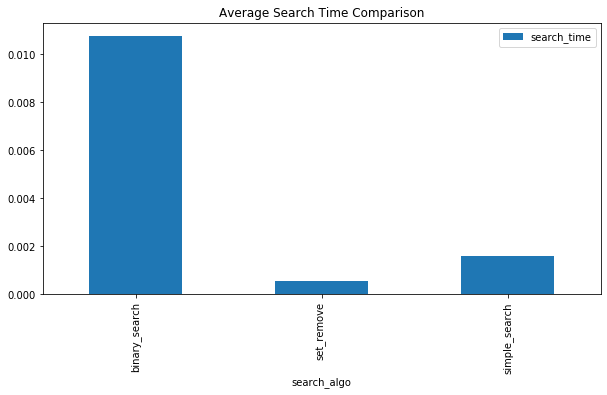

In [118]:
summarized_df.plot.bar(
    x="search_algo",
    y="search_time",
    figsize=(10, 5),
    title="Average Search Time Comparison",
)

## Executive Summary  
Sets in python are implemented as hash maps which explains their lightning fast search speeds. I was previously unaware that this is how sets performed. I would definitely recommend utilizing sets in the future for quickly searching if a value exists at least once in a list of items. Converting a list to a set keeps only unique values, and we can quickly apply a lookup based on the hashed value. All hash functions have an average time complexity of $O(1)$ for searching, inserting, and deleting. This becomes extremely useful if our application has a need for extremely fast response times. It is inefficient to loop over a large list to find a value when we can convert it to a hash map and perform the lookup in near constant time. Our organization needs to ensure that we are using a hashing algorithm that reduces our chances of collisions (two different values hasing to same value). Fortunately for us, this is taken care of under the hood by python.  

There are many practial applications that our company can utilize this fast lookup. Our website could utilize hash maps to cache search results by our users so that they can be served quickly on subsequent searches. We can also utilize hash maps to prevent duplicate entries. If a new user is registering with our website, can search a hash map for the email address provided to quickly let the user know if an account already exists.

On a personal note, even though I used random seeds, I was getting some weird results when re-running my cell blocks. I can't quite figure out why my average search time on Binary Search was greater than the linear search???  I triple-checked my code, and I can't explain why the binary search on a sorted list performed worse than the linear search on an unsorted list.

### Reference  
[1] Bhargava, A. Y. (2016). Grokking algorithms: An illustrated guide for programmers and other curious people.